In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout # components of network
from keras.models import Sequential # type of model

Using TensorFlow backend.


In [2]:
x_train_set_fpath = '../input/X_test_sat4.csv'
y_train_set_fpath = '../input/y_test_sat4.csv'
print ('Loading Training Data')
X_train = pd.read_csv(x_train_set_fpath)
print ('Loaded 28 X 28 X 4 images')
Y_train = pd.read_csv(y_train_set_fpath)
print ('Loaded labels')

Loading Training Data
Loaded 28 X 28 X 4 images
Loaded labels


In [8]:
X_train = X_train.values
Y_train = Y_train.values
print ('We have',X_train.shape[0],'examples and each example is a list of',X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')

We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


In [16]:
X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img.shape)

(99999, 28, 28, 4)


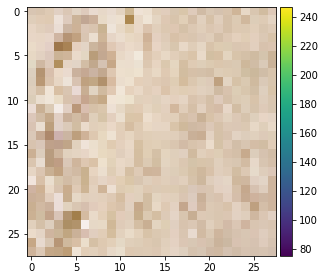

Barren Land


In [17]:
ix = 5#Type a number between 0 and 99,999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(int)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [19]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

In [20]:
X_train = X_train/255

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12548     
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Train on 98999 samples, validate on 1000 samples
Epoch 1/5
98999/98999 [==============================] - 23s 231us/step - loss: 0.6427 - acc: 0.7300 - val_loss: 0.7526 - val_acc: 0.6800
Epoch 2/5
98999/98999 [==============================] - 22s 218us/step - loss: 0.6388 - acc: 0.7314 - val_loss: 0.6612 - val_acc: 0.6970
Epoch 3/5
98999/98999 [==============================] - 21s 212us/step - loss: 0.6358 - acc: 0.7326 - val_loss: 0.7250 - val_acc: 0.6920
Epoch 4/5
98999/98999 [==============================] - 21s 212us/step - loss: 0.6345 - acc: 0.7328 - val_loss: 0.6150 - val_acc: 0.7630
Epoch 5/5
98999/98999 [==============================] - 22s 219u

In [24]:
preds = model.predict(X_train[-1000:], verbose=1)

1000/1000 [==============================] - 0s 77us/step


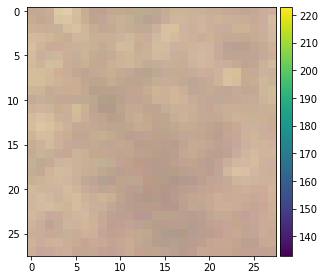

Prediction:
100.0% probability barren land,
0.0% probability trees,
0.0% probability grassland,
0.0% probability other

Ground Truth: Barren Land


In [25]:
ix = 8 #Type a number between 0 and 999 inclusive
imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype(int)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')